<a href="https://colab.research.google.com/github/C-Little26/ECGR4105/blob/main/Hw3/ECGR4105Hw3_Diabetes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#ECGR 4105 Homework 3 Problem 1
#Chris Little

In [2]:
#necessary libraries
import numpy as np
import pandas as pd
import seaborn as sea
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn import datasets
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
#import the dataset for problem 1
filepath_dia = '/content/drive/My Drive/Machine Learning/Datasets/diabetes.csv'
diabetes = pd.DataFrame(pd.read_csv(filepath_dia))
diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
#Problem 1
#Using the diabetes dataset, build a logistic regression binary classifier for positive diabetes.
#Please use 80% and 20% split between training and evaluation (test).
#Make sure to perform proper scaling and standardization before your training.
#Report the classification accuracy over iterations. Also, report your results, including accuracy, precision, and recall, FI score.
#At the end, plot the confusion matrix representing your binary classifier.

In [5]:
Y = diabetes.pop('Outcome')
X = diabetes

In [6]:
x_train, x_val, y_train, y_val = train_test_split(X,Y, test_size =0.2, random_state = 0)
x_train.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
603,7,150,78,29,126,35.2,0.692,54
118,4,97,60,23,0,28.2,0.443,22
247,0,165,90,33,680,52.3,0.427,23
157,1,109,56,21,135,25.2,0.833,23
468,8,120,0,0,0,30.0,0.183,38


In [7]:
sc_x = MinMaxScaler()
x_train = sc_x.fit_transform(x_train)
x_val = sc_x.fit_transform(x_val)

In [8]:
classifier = LogisticRegression(random_state=0)
classifier.fit(x_train, y_train)

LogisticRegression(random_state=0)

In [9]:
y_pred = classifier.predict(x_val)

In [10]:
cnf_mat = confusion_matrix(y_val, y_pred)
cnf_mat

array([[79, 28],
       [ 8, 39]])

In [15]:
#print metrics of classifier
print("Accuracy:",metrics.accuracy_score(y_val, y_pred))
print("Precision:",metrics.precision_score(y_val, y_pred))
print("Recall:",metrics.recall_score(y_val, y_pred))
print("F1 Score:", metrics.f1_score(y_val,y_pred))

Accuracy: 0.7662337662337663
Precision: 0.582089552238806
Recall: 0.8297872340425532
F1 Score: 0.6842105263157895


Text(0.5, 427.9555555555555, 'Predicted label')

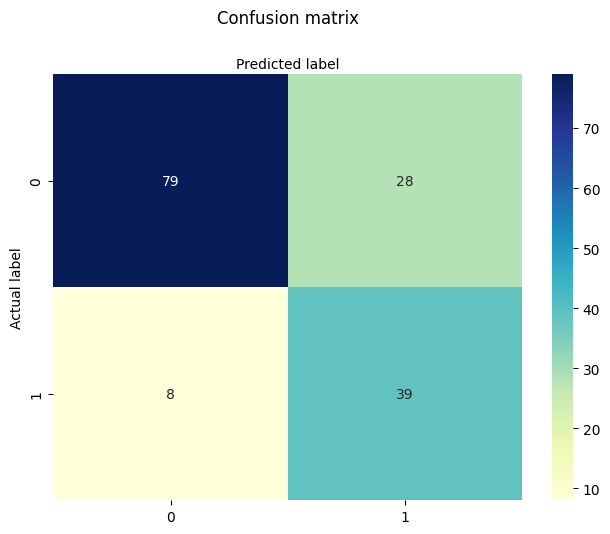

In [16]:
#draw confusion matrix
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sea.heatmap(pd.DataFrame(cnf_mat), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [14]:
#import the dataset for problem 1
filepath_can = '/content/drive/My Drive/Machine Learning/Datasets/cancer.csv'
cancer = pd.DataFrame(pd.read_csv(filepath_can))
cancer.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [ ]:
Y=cancer.pop("diagnosis")
